# Регрессия (ценообразование на рынке машин)


Задача:

Есть данные по американскому рынку продаж машин. Китайские аналитики заинтересованы **не в предсказани**и цен, а в **понимании ценообразования**. Нужно исследовать ценообразование с помощью линейной регрессии.

* Ниже проанализированы числовые и категориальные переменные, их влияние на таргет (цену).

* Данные проверены на допущения и трансформированы для линейной регрессии. 

* Построена модель линейной регрессии с коэффициент детерминации - около 91%. Найдены коэффициенты, аппроксимирующие влияние каждой переменной на таргет.

## Импорт библиотек и данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('/kaggle/input/car-price-prediction/CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.describe(include='all')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota corona,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


In [4]:
df.dtypes


car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [5]:
df['symboling'] = df['symboling'].astype('object')
cat_columns = df.select_dtypes(include=['object']).columns.tolist()
num_columns = df.drop('car_ID', axis=1).select_dtypes(include=['float64', 'int64']).columns.tolist()


## 2. Пропущенные значения

In [6]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

## 3. Дубликаты

In [7]:
df[df.duplicated()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


## 4. Выбросы

In [8]:
df[num_columns].describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


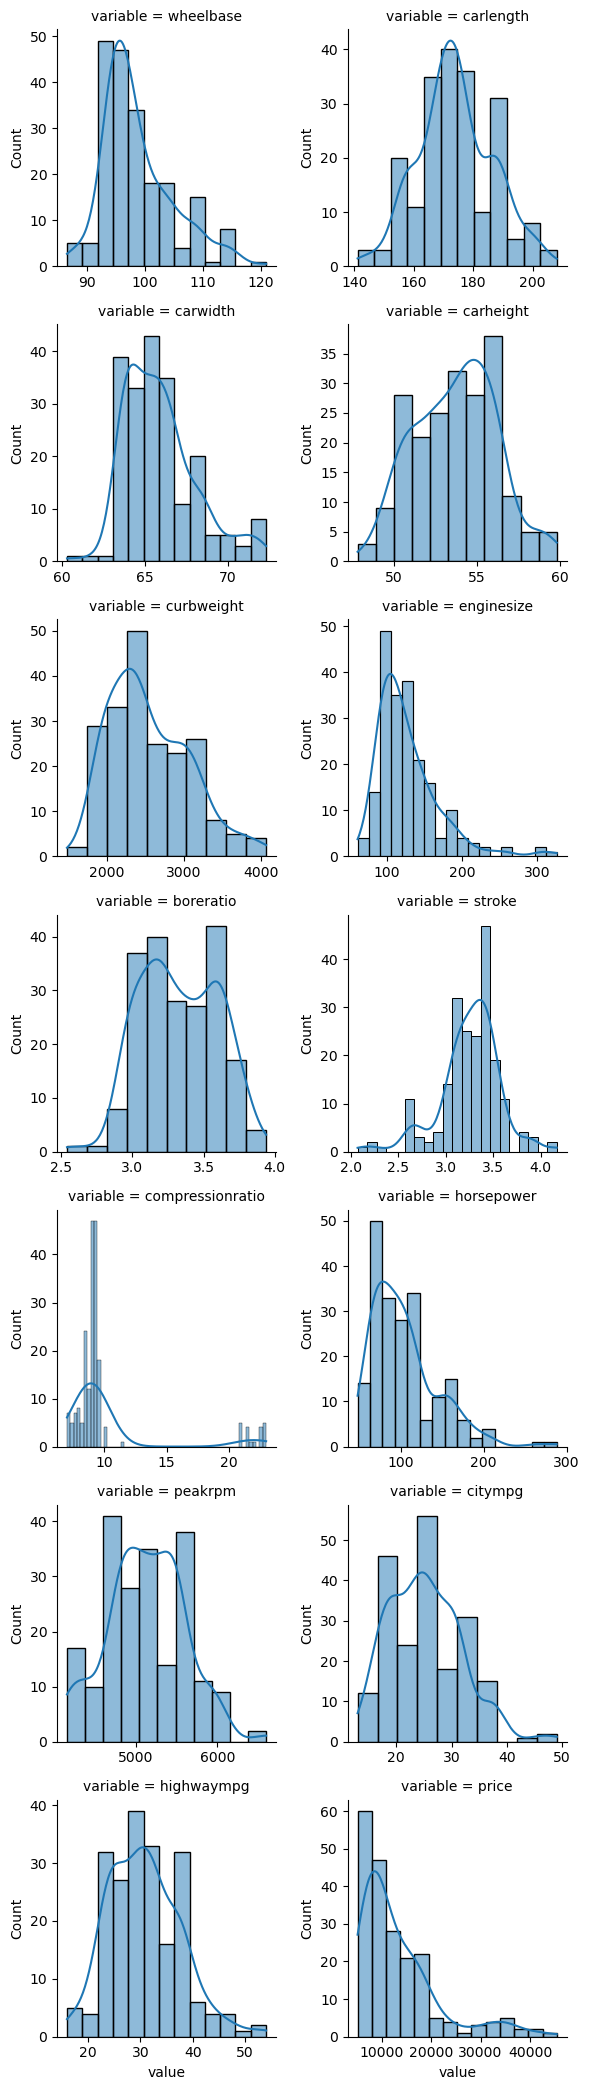

In [9]:
f = pd.melt(df, value_vars=num_columns)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.histplot, "value", kde=True)

In [10]:
def right_outliers(df, column):
  q75, q25 = df[column].quantile(0.75), df[column].quantile(0.25)
  iqr = q75 - q25
  return df[df[column] > q75 + 1.5*iqr]

print("Число выбросов > Q75 + 1.5*IQR")
for i in num_columns:
  print(i, right_outliers(df, i).shape[0])

Число выбросов > Q75 + 1.5*IQR
wheelbase 3
carlength 0
carwidth 8
carheight 0
curbweight 0
enginesize 10
boreratio 0
stroke 5
compressionratio 21
horsepower 6
peakrpm 2
citympg 2
highwaympg 3
price 15


По графикам и таблице выше, самые заметные выбросы можно увидеть в колонках - price (цена), compressionratio (коэффициент сжатия), horse power (лошадинные силы) и enginesize (размер двигателя). Однако их отрыв - не критичный и вполне объясняемый редкдостью дорогих с машин с самыми высокими параметрами для других показателей. Можно не удалять их из датафрейма.

In [11]:
# Посмотреть саммари по тем данным, где цена необычно высокая:
def describe_right_outliers(df, column):
  q75, q25 = df[column].quantile(0.75), df[column].quantile(0.25)
  iqr = q75 - q25
  return df[df[column] > q75 + 1.5*iqr].describe(include='all')


describe_right_outliers(df, 'price')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,15.000000,15.0,15,15,15,15,15,15,15,15.000000,...,15.000000,15,15.000000,15.0000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
unique,NaN,4.0,14,2,2,2,4,1,2,NaN,...,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,0.0,porsche cayenne,gas,std,two,sedan,rwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,7.0,2,14,14,8,9,15,12,NaN,...,NaN,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,71.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.840000,...,234.466667,NaN,3.661333,3.3080,9.620000,191.333333,5133.333333,16.000000,21.000000,35662.633333
std,40.930603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.445491,...,46.464836,NaN,0.132064,0.4264,3.444291,40.728485,559.229913,2.070197,3.854496,4172.232404
min,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.500000,...,183.000000,NaN,3.460000,2.7600,8.000000,123.000000,4350.000000,13.000000,16.000000,30760.000000
25%,48.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.500000,...,198.500000,NaN,3.600000,3.0000,8.000000,176.000000,4750.000000,15.000000,18.000000,32389.000000
50%,72.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.500000,...,209.000000,NaN,3.630000,3.3500,8.300000,182.000000,5000.000000,16.000000,20.000000,35056.000000
75%,101.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113.000000,...,258.000000,NaN,3.740000,3.3900,9.500000,207.000000,5575.000000,17.000000,25.000000,36954.000000


## 5. Распределение зависимой переменной

 Это важно, потому что далее для выбора категориальных переменных мы будм применять дисперсионный анализ, который предполагет нормальность распределения.

 На графике выше заметно, что распределение Цены не выглядит нормальным.

In [12]:
#Проверим тестом на нормальность Шапиро-Уилка

if shapiro(df.price)[1] < 0.05:
  print('Недостаточно оснований, чтобы признать данные нормально распределенными')
else:
  print('Мы можем принять гипоетзу о нормальности распределения')


Недостаточно оснований, чтобы признать данные нормально распределенными


<Axes: xlabel='log_price', ylabel='Count'>

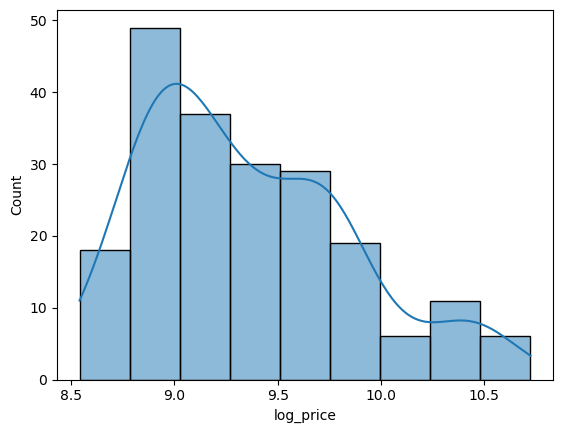

In [13]:
#Трансформация
df['log_price'] = np.log(df['price'])
sns.histplot(df['log_price'], kde=True)


In [14]:
num_columns.remove('price')
num_columns.append('log_price')
num_columns

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'log_price']

Данные все еще не распределены нормально, однако данное отклонение от нормальности можно считать несущественным.

## 6. Отношения между числовыми колонками:

### Допущение о линейности

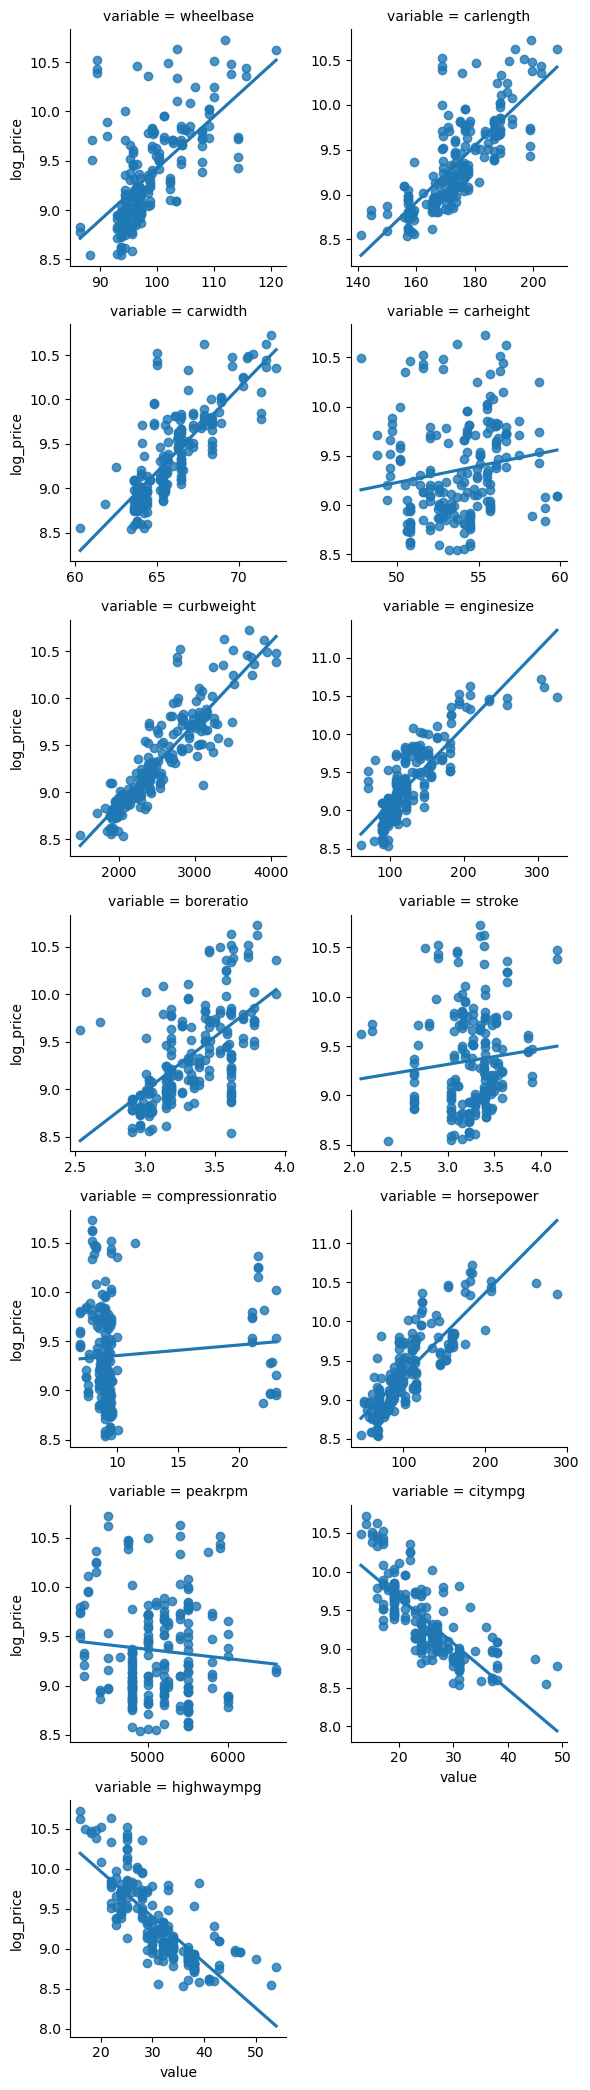

In [15]:
def regplot(x, y, **kwargs):
    sns.regplot(x=x, y=y, ci=None)

f = pd.melt(df, id_vars=['log_price'], value_vars=num_columns[:-1])
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(regplot, "value", "log_price")

<Axes: >

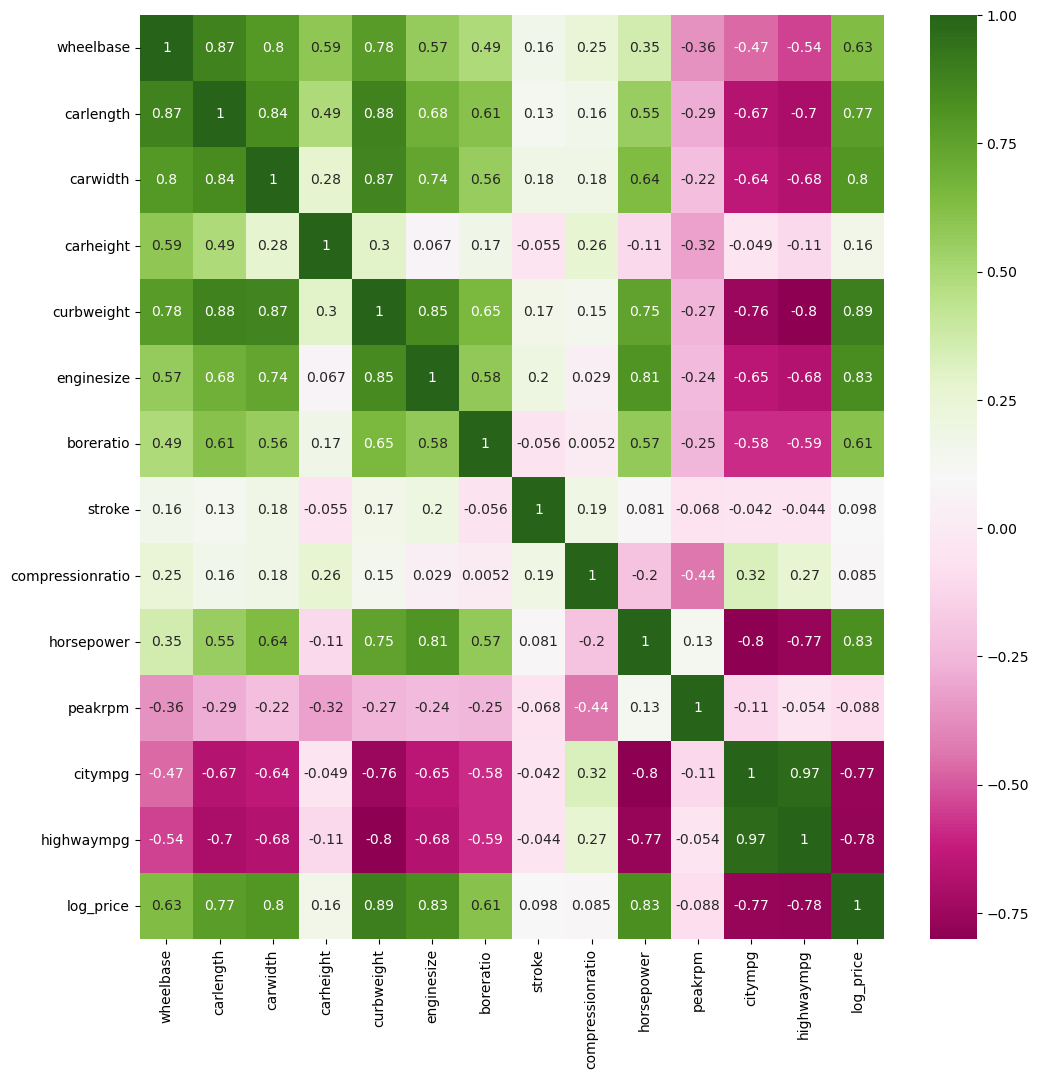

In [16]:
fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(df[num_columns].corr(), cmap="PiYG", annot=True, ax=ax)

In [17]:
#NB Абсолютные значения

abs(df[num_columns].corr()['log_price'].sort_values(ascending = False))

log_price           1.000000
curbweight          0.891237
enginesize          0.831985
horsepower          0.825835
carwidth            0.802544
carlength           0.767864
wheelbase           0.629401
boreratio           0.610565
carheight           0.162798
stroke              0.097992
compressionratio    0.085144
peakrpm             0.088454
citympg             0.771615
highwaympg          0.775197
Name: log_price, dtype: float64

### Выводы по графикам:

1. Сильная коррелация и линейные отношения с заивисимой переменной:

  * Между логарифмом цены (log_price) и пробегом в городе (citympg) и на шоссе (highwaympg) - **обратные линейные отношения**.

  * Между логарифмом цены (log_price) и лошадинными силами (horsepowers), размером двигателя (enginesize), коэффициентом проходимости (boreratio), весом машины (curbweight), шириной машины (carwidth), длиной машины (carlenght) - **прямые линейные отношения**. Между ценой и дистаницией между колесамми (wheelbase)  можно заметить некоторую линейную завивимость, но уже слабее.

2. Слабые отношения с зависимой переменной:
Слабая корреляция с логарифмом цены, **не видно тренда** - пиковые обороты (peakrpm), объем внутри двигателя (stroke), высота машины (carheight).

3. **Две четких группы** можно заметить в распределении коэффициента сжатия (compressionrate). Меньше 10 и больше 20. Однако здесь прямой прямой заивисмости с ценой, разве что разброс цен больше в перрвой группе.

4. Отношения между независимыми переменными:
   * Предсказуемо, можно увидеть сильную корреляцию между лошадинными силами, весом машины, размером двигателя, шириной машины, длиной машины и дистанцией между колесами. **Габариты и мощность машины**.
   * А также очень сильную корреляцию между пробегом в городе и на шоссе. **Пробег**.

### Допущение об отсутствии мультиколлинеарности

In [18]:
variables = df[num_columns]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,1910.318030,wheelbase
1,1893.878925,carlength
2,3330.064333,carwidth
3,962.676004,carheight
4,407.601454,curbweight
5,72.457135,enginesize
6,295.210823,boreratio
7,126.721421,stroke
8,16.544138,compressionratio
9,67.935943,horsepower


Такие высокие значения предполагают мультиколлинеарность. Следовательно, многие переменные из этого списка нужно или удалять, или объединять.

* Из коррелирующих carweight, curbweight, enginesize, carlength, wheelbase - мы оставим только **curbweight**.  Поскольку именно он более всего коррелирует с ценой. Этот показатель будет репрезентировать габариты машины.

* Из показателей, характеризующих пробег, оставим highwaympg.

In [19]:
variables = df[['curbweight', 'highwaympg', 'horsepower']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,36.607513,curbweight
1,8.111902,highwaympg
2,20.221521,horsepower


In [20]:
final_num_vars = ['curbweight', 'highwaympg']

variables = df[final_num_vars]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,6.650895,curbweight
1,6.650895,highwaympg


Анализ на мультиколлинеарность показывает, что нужно оставить только две переменные. Нужно проверить, не упустим ли мы какие-нибудь отношения, если откажемся от остальных параметров.

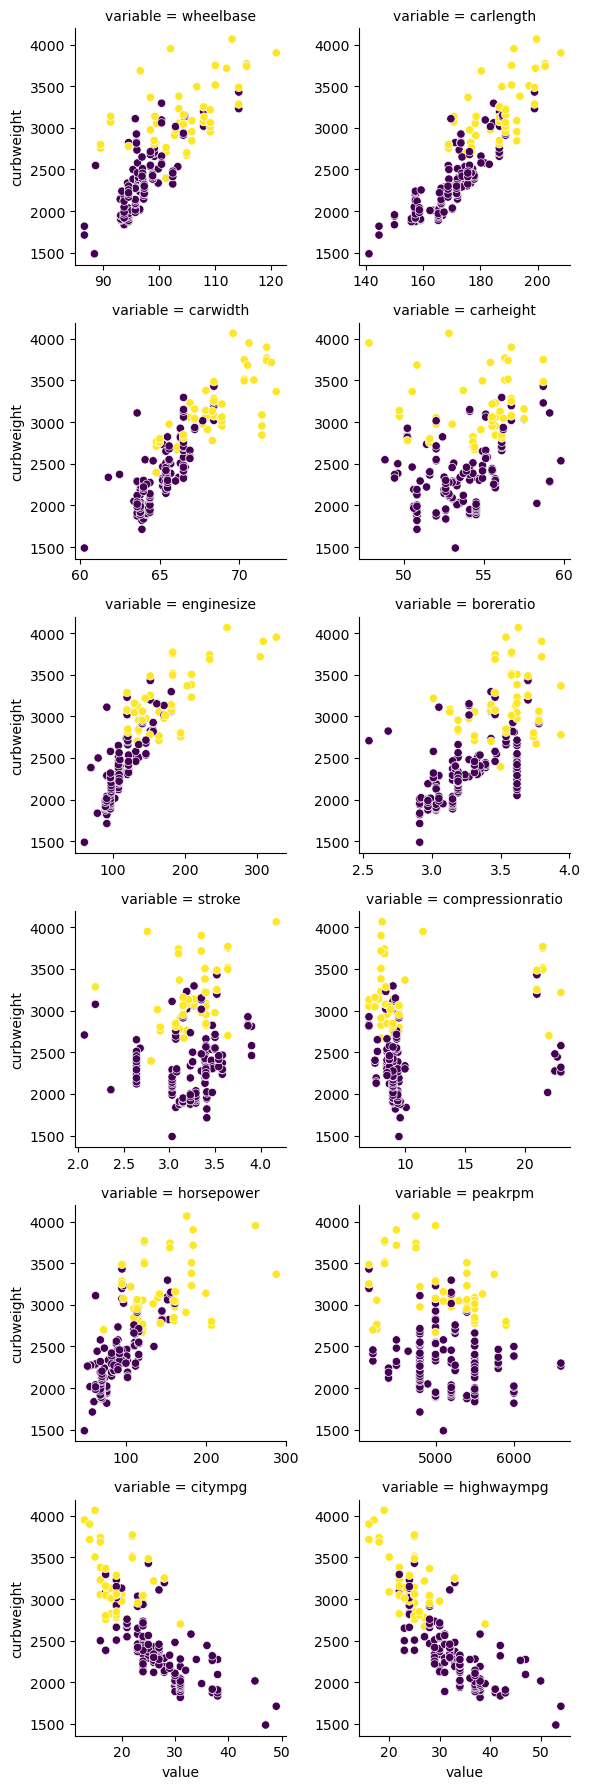

In [21]:
df['price_segment'] = pd.cut(df['price'], bins = [0, 16500, max(df['price'])], labels=[0,1])

def scatterplot(x, y, **kwargs):
    sns.scatterplot(x=x, y=y, c=df['price_segment'])

f = pd.melt(df, id_vars=['curbweight'], value_vars=num_columns[:-1])
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(scatterplot, "value", "curbweight")

In [22]:
# добавим horsepower

final_num_vars.append('horsepower')

## 7. Отношения между категориальными колонками и зависимой

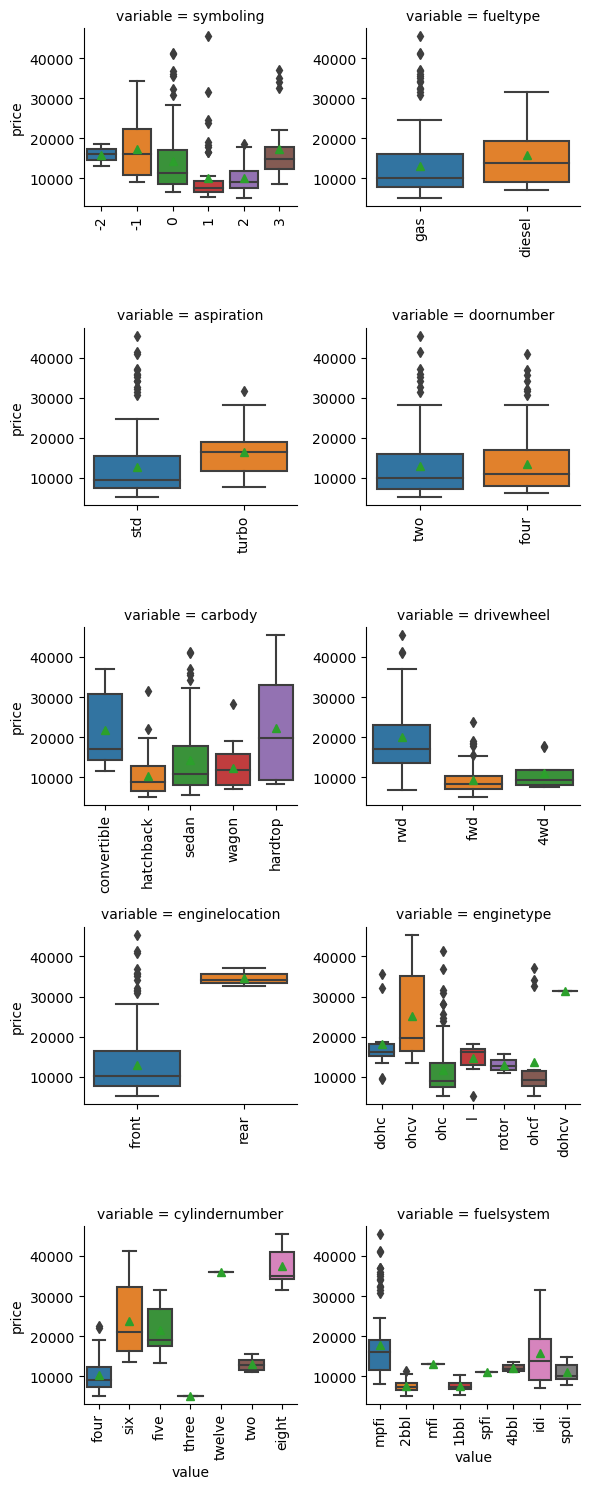

In [23]:
cat_columns_short = cat_columns[:]
cat_columns_short.remove('CarName') #там слишком много групп для графиков

# для графиков - цена, а не логарифм

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y, showmeans=True)
    x=plt.xticks(rotation=90)

f = pd.melt(df, id_vars=['price'], value_vars=cat_columns_short)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(boxplot, "value", "price")

In [24]:
# Дисперсионный анализ
anv_results = pd.DataFrame()
anv_results['feature'] = cat_columns
pvals = []
for col_name in cat_columns:
    samples = []
    for col_value in df[col_name].unique():
        s = df[df[col_name] == col_value]['log_price'].values
        samples.append(s)
    pval = f_oneway(*samples)[1]
    pvals.append(pval)
anv_results['pval'] = pvals
anv_results = anv_results.sort_values('pval')
anv_results

,feature,pval
9,cylindernumber,4.032064e-31
6,drivewheel,7.410259e-29
10,fuelsystem,4.464444e-28
1,CarName,5.328702e-11
0,symboling,2.131625e-09
8,enginetype,1.106730e-08
5,carbody,1.541664e-05
7,enginelocation,1.220962e-04
3,aspiration,1.942145e-04
2,fueltype,5.797728e-02


Различия между категориями во всех колонках **значимы**. 
В каких колонках группы отличаются больше, то есть где p-value меньше, где больше оснований отклонить нулевую гипотезу о равенстве групп? 

Для этого нужно вычислить -log10(p-value).

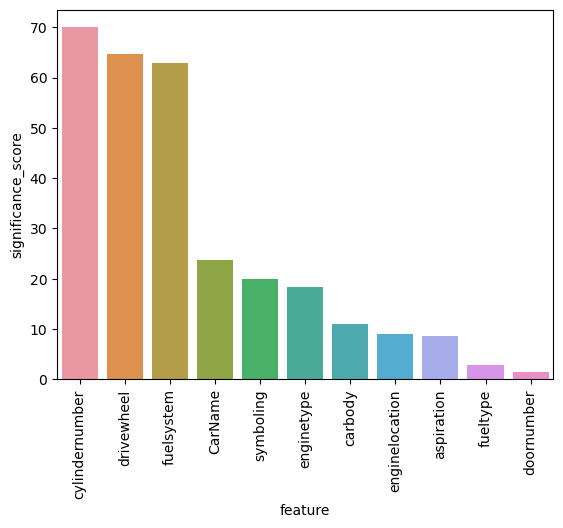

In [25]:
anv_results['significance_score'] = np.log(1./anv_results['pval'].values)
sns.barplot(data=anv_results, x='feature', y='significance_score')
x=plt.xticks(rotation=90)

Категориальных перменных слишком много. Нужно урать меее значимые, а значимые с большим количеством значений - сократить до двух значений. Иначе получится слишком много колонок после pd.get_dummies.

### Новые категориальные переменные

In [26]:
#Mapping

df['Map_cylindernumber'] = df['cylindernumber'].map({'two':'2, 3 or 4', 
                                                     'three': '2, 3 or 4', 
                                                     'four': '2, 3 or 4',
                                                     'five': '5 or 6',
                                                     'six': '5 or 6',
                                                     'eight':'8 or 12',
                                                     'twelve':'8 or 12'})
df['Map_drivewheel'] = df['drivewheel'].map({'rwd':'rwd',
                                             'fwd':'fwd or 4wd',
                                             '4wd': 'fwd or 4wd'})

df['Map_fuelsystem'] = df['fuelsystem'].map({'1bbl':'1 or 2 bbl',
                                            '2bbl': '1 or 2 bbl',
                                            'mpfi':'other',
                                            'mfi': 'other',
                                            'spfi':'other',
                                            '4bbl':'other',
                                            'idi':'other',
                                            'spdi': 'other'})

#CarName мы не берем - слишком много моделей

#Symboling мы не берем - нет внутренней логики (уменьшение риска не увеличивает цену)

df['Map_enginetype'] = df['enginetype'].map({'dohc':'other', 
                                             'ohcv':'other', 
                                             'ohc':'ohc', 
                                             'l':'other', 
                                             'rotor':'other', 
                                             'ohcf':'other', 
                                             'dohcv':'other'})

df['Map_carbody'] = df['carbody'].map({'convertible':'hardtop or conv', 
                                       'hatchback':'other', 
                                       'sedan':"other", 
                                       'wagon':"other", 
                                       'hardtop':"hardtop or conv"})

#Остальные исключим из модели

mapped = ['Map_cylindernumber', 'Map_drivewheel', 'Map_fuelsystem', 'Map_enginetype', 'Map_carbody' ]

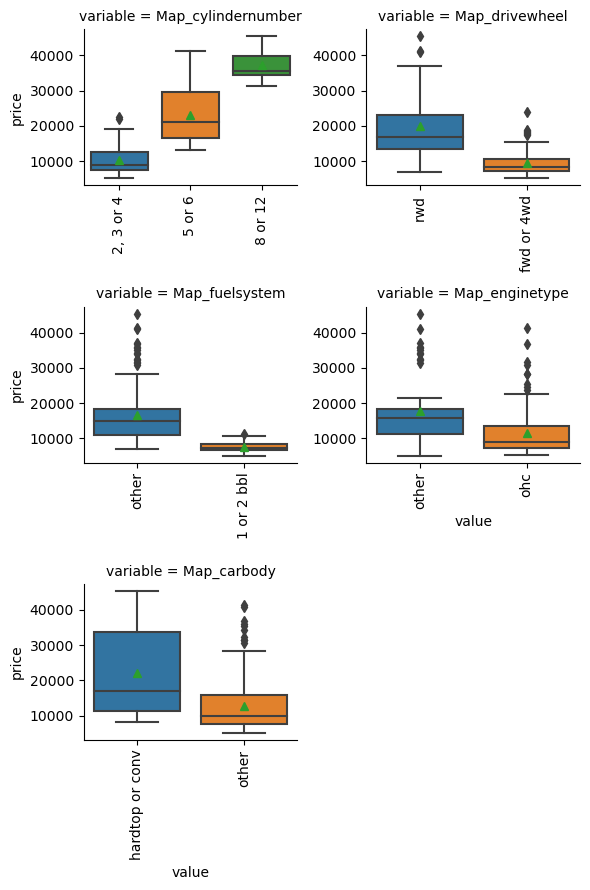

In [27]:
#для графиков - цена, а не логарифм

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y, showmeans=True)
    x=plt.xticks(rotation=90)

f = pd.melt(df, id_vars=['price'], value_vars=mapped)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(boxplot, "value", "price")

## 8. Линейная регрессия

In [28]:
X_reg = pd.get_dummies(df[final_num_vars + mapped], drop_first=True)
y_reg = df['log_price']

x_train, x_test, y_train, y_test = train_test_split(X_reg, y_reg, random_state=23)

reg = LinearRegression()
reg.fit(x_train,y_train)
reg_summary = pd.DataFrame(X_reg.columns.values, columns=['Переменная'])
reg_summary['Коэффициент для log(price)'] = reg.coef_
reg_summary['Коэффициент для price'] = np.exp(reg.coef_)
reg_summary['Как меняется цена ( в %)'] = (np.exp(reg.coef_) - 1) * 100
reg_summary

,Переменная,Коэффициент для log(price),Коэффициент для price,Как меняется цена ( в %)
0,curbweight,0.000460,1.000460,0.045976
1,highwaympg,-0.001802,0.998200,-0.180019
2,horsepower,0.002839,1.002843,0.284332
3,Map_cylindernumber_5 or 6,0.172068,1.187759,18.775904
4,Map_cylindernumber_8 or 12,0.165711,1.180232,18.023247
5,Map_drivewheel_rwd,0.115671,1.122626,12.262594
6,Map_fuelsystem_other,0.140196,1.150499,15.049927
7,Map_enginetype_other,-0.105230,0.900117,-9.988269
8,Map_carbody_other,-0.123508,0.883814,-11.618587


In [29]:
reg.score(x_test,y_test)

0.9101189836877098

Text(0.5, 1.0, 'Распределение ошибок')

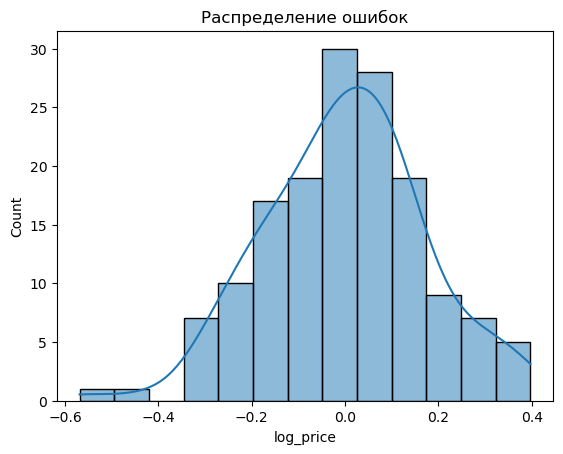

In [30]:
#Допущение о нормальности распределения ошибок

y_hat = reg.predict(x_train)
sns.histplot(y_train - y_hat, kde=True)
plt.title("Распределение ошибок", size=12)

## Интерпретация

(1) В модели соблюдены допущения для линейной регресии.

(2) Модель имеет высокое значение коэффициента детерминации (R^2).

(3) Интерпретация коэффицикнтов ослажняется тем, что таргет - логарифм от цен.Получается:
   * изменение независимой переменной на **1 юнит** - увеличивает **натуральный логарифм цены** в **коэффициент** раз.

   * изменение натурального логарифма можно перевести в изменение оригинальной цены или процентное изменение (указано в таблице с коэффициентами).

   * коэффициенты для dummy переменных - показывает, на сколько значение таргета для этой категории больше в сравнении с другими категориями.

(4) Чтобы подробнее понять ценообразование для разных категорий, можно вернуться к графикам выше.